<a href="https://colab.research.google.com/github/sushrut88/Machine-Learning-Lab/blob/main/practical3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4   
1           2   41  Female      28               28              7   
2           3   47    Male      27               10              2   
3           4   35    Male       9               12              5   
4           5   53  Female      58               24              9   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             27             Basic         Monthly          598   
1             13          Standard         Monthly          584   
2             29           Premium          Annual          757   
3             17           Premium       Quarterly          232   
4              2          Standard          Annual          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3                18      0  
4                18      0  
<c

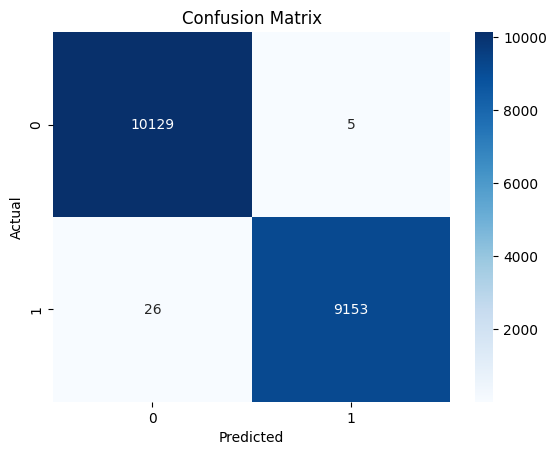

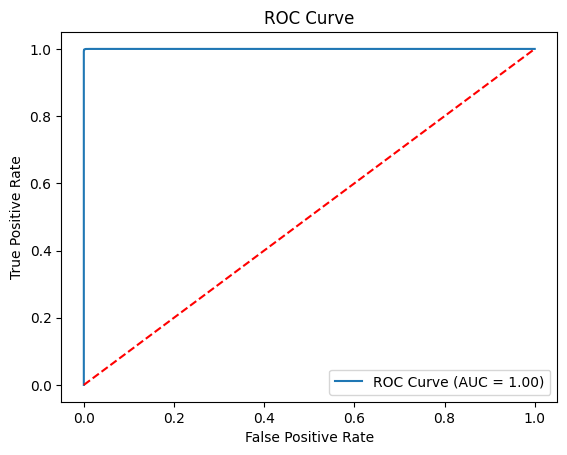

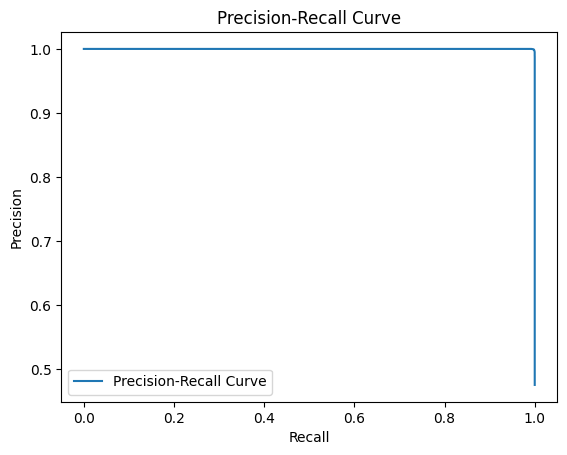

Mean Absolute Error (MAE): 0.03
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.07


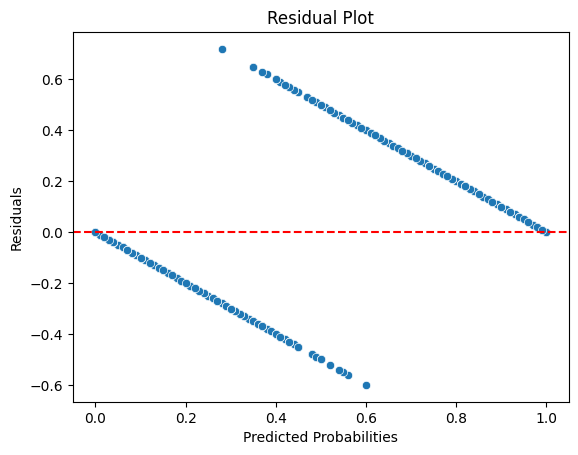

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, roc_curve, precision_recall_curve, mean_absolute_error,
    mean_squared_error
)
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("customer_churn.csv")  # Replace with your dataset path

# Inspect the data
print(data.head())
print(data.info())

# Preprocessing
# Handle missing values
numeric_cols = data.select_dtypes(include=["number"]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

categorical_cols = data.select_dtypes(include=["object"]).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Encode categorical variables
data = pd.get_dummies(data, columns=["Gender", "Subscription Type", "Contract Length"], drop_first=True)

# Drop irrelevant columns
X = data.drop(["Churn", "CustomerID"], axis=1)  # Adjust based on dataset
y = data["Churn"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a classification model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
# Classification Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="red")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Precision-Recall Curve
precisions, recalls, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label="Precision-Recall Curve")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

# Regression Evaluation (Example using probabilities as target)
# Simulating regression evaluation for churn probability prediction
regression_true = y_test  # Assuming probabilities
regression_pred = y_pred_proba

mae = mean_absolute_error(regression_true, regression_pred)
mse = mean_squared_error(regression_true, regression_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Residual Plot
residuals = regression_true - regression_pred
sns.scatterplot(x=regression_pred, y=residuals)
plt.axhline(0, linestyle="--", color="red")
plt.title("Residual Plot")
plt.xlabel("Predicted Probabilities")
plt.ylabel("Residuals")
plt.show()
